<a href="https://colab.research.google.com/github/Jessica1842553/MCDaa2025/blob/main/T6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Tarea 6 - Jessica Lizeth Hernández Bracho 1842553
### **Pronóstico**

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

In [2]:
df = pd.read_csv('/content/student-mat.csv', sep=";")

In [3]:
# Modificando columnas - convertir 'yes'/'no' a 1/0
df['higher'] = df['higher'].map({'yes': 1, 'no': 0})

In [4]:
#Variables de Interés a analizar
x = df[['age',
       'studytime',
       'failures',
       'absences',
        'higher',
       'G1',
       'G2']]

y = df['G3']

### Separacion de datos: Entrenamiento ~ Prueba (Sklearn)

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
x_test

,age,studytime,failures,absences,higher,G1,G2
78,17,1,3,2,0,8,8
371,18,1,0,3,0,14,12
248,18,2,1,8,1,3,5
55,16,2,0,8,1,8,9
390,20,2,2,11,1,9,9
...,...,...,...,...,...,...,...
364,17,2,0,0,1,12,11
82,15,2,0,10,1,7,6
114,15,2,0,8,1,9,9
3,15,3,0,2,1,15,14


## Algoritmo Supervisado: Modelo de Regresión Lineal

Este modelo asume que existe una relación lineal entre las variables predictoras y la variable de respuesta, y tiene la siguiente forma general:

$y = a + bx_1 + b_2x_2 + ... + b_nx_n$


Donde:
- **a** es el intercepto del modelo,
- **$b_n$** son los coeficientes que indican el impacto de cada variable sobre la **variable independiente**.

In [7]:
from sklearn import linear_model

In [8]:
model = linear_model.LinearRegression()
model

LinearRegression()

In [9]:
model.fit(x_train, y_train)

LinearRegression()

In [10]:
model.intercept_

np.float64(1.0172937847855952)

In [11]:
model.coef_

array([-0.17106411, -0.06170072, -0.37279366,  0.04332322,  0.1409717 ,
        0.16145143,  0.96417306])

$y = 1.0173 + (-0.1711)x_1 + (-0.0617)x_2 + (-0.3728)x_3 + 0.04332x_4 + 0.141x_5 + 0.1615x_6 + 0.9642x_7$

In [12]:
y_pred = model.predict(x_test)

In [13]:
y_pred[:10]

array([ 6.02076447, 11.83680533,  3.23472168,  8.61359292,  7.47517024,
       12.42737685, 18.97824089,  7.27993044,  6.96070587, 12.8657642 ])

In [14]:
# DataFrame con valores reales vs predichos
results_df = pd.DataFrame({'Actual G3': y_test, 'Predict G3': y_pred})
display(results_df.head())

,Actual G3,Predict G3
78,10,6.020764
371,12,11.836805
248,5,3.234722
55,10,8.613593
390,9,7.475170


## Métricas

**MAE:** Error absoluto medio. Indica cuánto se desvía en promedio la predicción del valor real.  
*Formula:* $(1/n) ∑ |yᵢ - ŷᵢ|$

**RMSE:** Raíz del error cuadrático medio. Representa la desviación estándar de los residuales (errores de predicción).  
*Formula:* $\sqrt{((1/n) ∑ (yᵢ - ŷᵢ)²)}$




In [15]:
from sklearn.metrics import mean_absolute_error as mae

In [16]:
import numpy as np

In [17]:
mae_v = mean_absolute_error(y_test, y_pred)

In [18]:
rmse_v = np.sqrt(mean_squared_error(y_test, y_pred))

In [19]:
print("MAE (Mean Absolute Error):", round(mae_v, 2))
print("RMSE (Root Mean Squared Error):", round(rmse_v, 2))

MAE (Mean Absolute Error): 1.33
RMSE (Root Mean Squared Error): 2.11


## Predicciones vs Reales

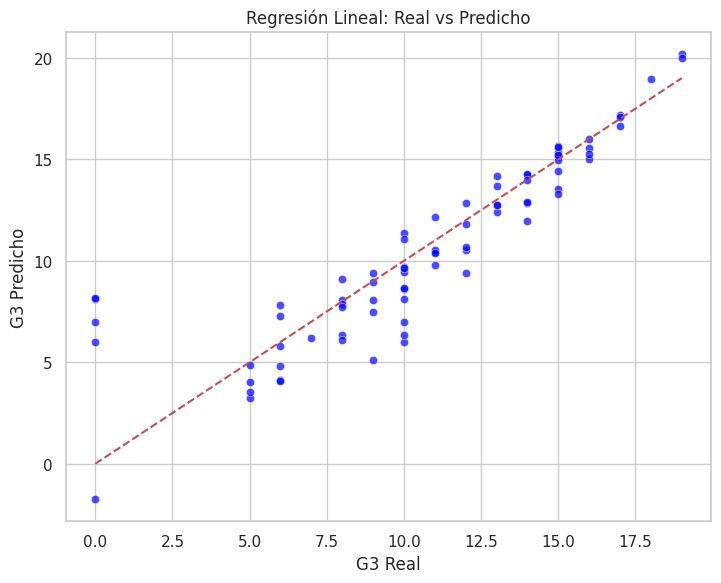

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Estilo
sns.set(style="whitegrid")

plt.figure(figsize=(14, 6))

# Gráfico: Regresión Lineal
plt.subplot(1, 2, 1)
sns.scatterplot(x='Actual G3', y='Predict G3', data=results_df, color='blue', alpha=0.7)
plt.plot([results_df['Actual G3'].min(), results_df['Actual G3'].max()], [results_df['Actual G3'].min(), results_df['Actual G3'].max()], 'r--') # Adjusted line to fit data range
plt.xlabel('G3 Real')
plt.ylabel('G3 Predicho')
plt.title('Regresión Lineal: Real vs Predicho')

plt.tight_layout()
plt.show()

### Gráfica: Comparación de Predicciones vs Valores Reales

Para evaluar visualmente el desempeño del modelo, se graficaron las predicciones frente a los valores reales de la calificación final *(G3)* en el conjunto de prueba.

Aunque el modelo captura una tendencia general, se nota cierta dispersión, especialmente en los extremos. Esto indica que la regresión lineal no siempre logra ajustarse con precisión a los valores reales, especialmente cuando se alejan del promedio.


### **Extra:** Random Forest

Random Forest Regressor:
MAE: 1.03
RMSE: 1.73
R² (coeficiente de determinación): 0.85


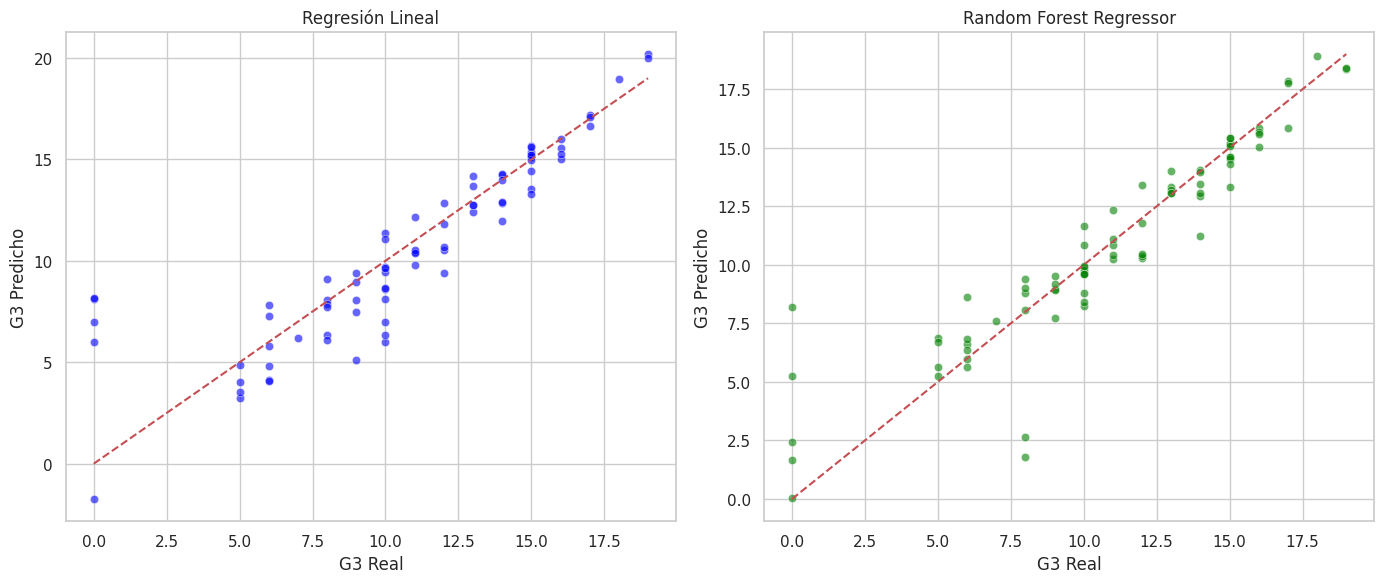

In [21]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

# Modelo de Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Separacion de datos: Entrenamiento
rf_model.fit(x_train, y_train)

# Predecir con Random Forest
rf_pred = rf_model.predict(x_test)

# Métricas para Random Forest
rf_mae = mean_absolute_error(y_test, rf_pred)
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_pred))
rf_r2 = r2_score(y_test, rf_pred)

# Mostrar métricas
print("Random Forest Regressor:")
print(f"MAE: {round(rf_mae, 2)}")
print(f"RMSE: {round(rf_rmse, 2)}")
print(f"R² (coeficiente de determinación): {round(rf_r2, 2)}")

# Comparación visual entre regresión lineal y random forest
plt.figure(figsize=(14, 6))

# Gráfico para regresión lineal
plt.subplot(1, 2, 1)
sns.scatterplot(x='Actual G3', y='Predict G3', data=results_df, color='blue', alpha=0.6)
plt.plot([results_df['Actual G3'].min(), results_df['Actual G3'].max()],
         [results_df['Actual G3'].min(), results_df['Actual G3'].max()], 'r--')
plt.title("Regresión Lineal")
plt.xlabel("G3 Real")
plt.ylabel("G3 Predicho")

# Gráfico para Random Forest
plt.subplot(1, 2, 2)
rf_results_df = pd.DataFrame({'Actual G3': y_test, 'Predict G3': rf_pred})
sns.scatterplot(x='Actual G3', y='Predict G3', data=rf_results_df, color='green', alpha=0.6)
plt.plot([rf_results_df['Actual G3'].min(), rf_results_df['Actual G3'].max()],
         [rf_results_df['Actual G3'].min(), rf_results_df['Actual G3'].max()], 'r--')
plt.title("Random Forest Regressor")
plt.xlabel("G3 Real")
plt.ylabel("G3 Predicho")

plt.tight_layout()
plt.show()


Se aplicó el algoritmo Random Forest Regressor, un método supervisado que construye múltiples árboles de decisión y promedia sus resultados para mejorar la precisión.

El modelo de Random Forest, al ser un algoritmo más complejo y no lineal, logró mejores resultados en ambas métricas de evaluación:

- **Regresión Lineal**: MAE ≈ *1.33*, RMSE ≈ *2.11*
- **Random Forest**: MAE ≈ *1.03*, RMSE ≈ *1.73*

Las gráficas de dispersión muestran que las predicciones del modelo de Random Forest están más cerca de la línea ideal, confirmando visualmente su desempeño.

En conclusión, aunque la regresión lineal es útil como modelo base, **el modelo de Random Forest podría resultar ser una mejor opción para el conjunto de datos**.